## Table of Contents

* [Introduction](#inspiration)
* [Datasets Used](#du)
* [Import Libraries](#il)
* [Reading Data](#rd)
* [1st Visualization : Analyze top three populated countries](#1v)
    > [Insights](#i1)
* [2nd Visualization : Indian Paradox: Rising Education, Decrease in Women's Labor Force](#2v)
   > [Insights](#i2)
* [3rd Visualization : Highest CO2 emission in United States](#3v)
   >[Insights](#i3)
* [Exploratory Data Analysis](#ed)
     0. [Reduction in Rural Population by Country](#e1)
     1. [Employment Sectors by Country](#e2))
     2. [GDP Comparison of USA, India, China with World GDP](#e3)
     3. [Compare Road Traffic Fatal Injuries in United States, India and China](#e4)
     4. [All Three Countries have over 50% Employment to Population Ratio](#e5)

## Introduction <a name="inspiration"></a>

[World Bank data](https://data.worldbank.org/country) is gold mine to support crucial management decisions that can show how countries are doing and fix issues to improve people's lives. I was curious to compare how India, China & United States compare on multiple metric of real-world importance and what are the real causes that differentiates the standard of living in all three countries.

## Datasets Used <a name="du"></a>
* [World Bank Metrics Data](https://github.com/dkekre21/World-Bank-Data-Analysis-1991-2017/blob/master/Datasets/API_Download_DS2_en_csv_v2_10077498.csv)
* [World Population Data](https://github.com/dkekre21/World-Bank-Data-Analysis-1991-2017/blob/master/Datasets/WorldPopulation.csv)

[The datasets can also be directly downloaded from world bank website](https://data.worldbank.org/country)

## Import Libraries <a name="il"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from matplotlib.ticker import FuncFormatter
import plotly.plotly as py
import plotly.graph_objs as go
from math import log1p
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.options.display.max_columns = None

In [3]:
sns.set_context('talk')
sns.set_style('darkgrid')

## Reading Data <a name="rd"></a>

In [4]:
df_pop=pd.read_csv("WorldPopulation.csv", engine="python")

In [5]:
df=pd.read_csv("API_Download_DS2_en_csv_v2_10077498.csv", sep=",", skiprows=3)

In [6]:
columns=['Country Code', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990','Unnamed: 62']
df.drop(columns, inplace=True, axis=1)

In [7]:
def y_fmt(x, pos):
    if x >= 1000000000000:        
        return '%1.0fT' % (x*1e-12)
    elif x >= 1000000000:        
        return '%1.0fB' % (x*1e-9)
    elif x >= 1000000:        
        return '%1.0fM' % (x*1e-6)
    elif x >= 1000:        
        return '%1.0fK' % (x*1e-3)
    else:
        return int(x)

## 1st Visualization: Analyze top three populated countries <a name="1v"></a>

In [8]:
data = [ dict(
        type = 'choropleth',
        locations = df_pop['Country Code'],
        z = df_pop['2017'],
        text = df_pop['Country Name'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,            
            title = 'Population',
        len=.6,
        thickness=20),
      ) ]
layout = dict(
    title = '2017 Global Population<br>(Hover for Breakdown)',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        lakecolor='rgb(255, 255, 255)',
        projection = dict(
            type = 'Mercator'
        )
    )
)
fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

In [120]:
data={'growth rate': [0.69,0.94,1.52], 'country name': ['China', 'United States', 'India']}
df_growth_rate=pd.DataFrame(data)

In [178]:
data=[go.Bar({
    'x':df_growth_rate['country name'],
    'y':df_growth_rate['growth rate'], 'marker':dict(
        color=['rgba(0, 128, 0,1)', 'rgba(128, 0, 0,1)', 
               'rgba(0, 0, 128,1)']),
    'opacity':1
})]
layout=go.Layout(title="Average Growth Rate from 1991-2017 (%)",
                 font=dict(size=18),
                 yaxis={'title':'growth rate (%)',
                       'tickfont':dict(size=16)})
annotations=[]
for index, row in df_growth_rate.iterrows():
    temp=df_growth_rate.loc[index]
    if temp['country name']=="China":
        col='rgba(0, 128, 0,1)'
    elif temp['country name']=="India":
        col='rgba(0, 0, 128,1)'
    elif temp['country name']=="United States":
        col='rgba(128, 0, 0,1)'
    annotations.append(dict(x=temp['country name'], y=(temp['growth rate']+.1), text=(str(float(temp['growth rate']))+"%"),
                                font=dict(family='Arial', size=16,
                                color=col),
                                showarrow=False,))    
layout['annotations']=annotations
fig=dict(data=data, layout=layout)
py.iplot(fig)

In [10]:
df1=df.loc[df['Indicator Name'].str.find('Population ages 65 and above (% of total)')!=-1,:]
df2=df.loc[df['Indicator Name'].str.find('Population ages 15-64 (% of total)')!=-1,:]
df3=df.loc[df['Indicator Name'].str.find('Population ages 0-14 (% of total)')!=-1,:]

In [11]:
df_pop_dist= pd.concat([df1,df2,df3])
df_pop_dist=df_pop_dist[df_pop_dist['Country Name']!='World']
df_pop_2017=df_pop_dist.loc[:,['Country Name','Indicator Name','2017']]
df_pop_2017=pd.pivot_table(df_pop_2017, values='2017', index='Country Name', columns='Indicator Name')
df_pop_2017.reset_index(inplace=True)

In [189]:
trace1 = go.Bar(
    x=df_pop_2017['Country Name'],
    y=df_pop_2017['Population ages 0-14 (% of total)'],
    name='ages 0-14'
)
trace2 = go.Bar(
    x=df_pop_2017['Country Name'],
    y=df_pop_2017['Population ages 15-64 (% of total)'],
    name='ages 15-64'
)
trace3 = go.Bar(
    x=df_pop_2017['Country Name'],
    y=df_pop_2017['Population ages 65 and above (% of total)'],
    name='ages 65 and above'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group',
    title="Population distribution by Age per Country (2017)",
                 font=dict(size=22),
                     yaxis=dict(title='population (% of total)',
                       tickfont=dict(size=16),
                       titlefont=dict(                        
                        size=22,
                        color='black'
                        )),                 
                showlegend=True,
                 legend=dict(x=0, y=1.05, font=dict(
            family='sans-serif',
            size=16,
            color='#000'
        ),orientation="h"),
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### Insights <a name="i1"> </a>
* China is the most populated nation in 2017. However, India is second nation with over 1Billion. Current growth rate of 1.5% suggests that if Indian government does not put stringent methods in place it will become the most populated country beating.
* China, India, United States all three countries have nearly 60-70% of their population in working age group. This is a positive sign of country's demographic health.

## 2nd Visualization: Indian Paradox: Rising Education, Decrease in Women's Labor Force <a name="2v"></a>

### Declining Women Labor Force

In [67]:
# women labor force
df_labor_frc_women= df[df['Indicator Name'] == 'Labor force, female (% of total labor force)']
df_labor_frc_women.drop(columns='Indicator Name', inplace=True)
df_labor_frc_women=df_labor_frc_women.T
df_labor_frc_women.columns = df_labor_frc_women.loc['Country Name']
df_labor_frc_women.reset_index(inplace=True)
df_labor_frc_women=df_labor_frc_women.reindex(df_labor_frc_women.index.drop(0))
df_labor_frc_women.rename(columns={'index':'Years'}, inplace=True)
df_labor_frc_women['Years']=pd.to_numeric(df_labor_frc_women['Years'])
# men labor force
df_labor_frc_men=df_labor_frc_women.copy()
df_labor_frc_men['China']=100-df_labor_frc_women['China']
df_labor_frc_men['India']=100-df_labor_frc_women['India']
df_labor_frc_men['United States']=100-df_labor_frc_women['United States']
df_labor_frc_men['World']=100-df_labor_frc_women['World']
df_labor_frc_men['Years']=pd.to_numeric(df_labor_frc_men['Years'])

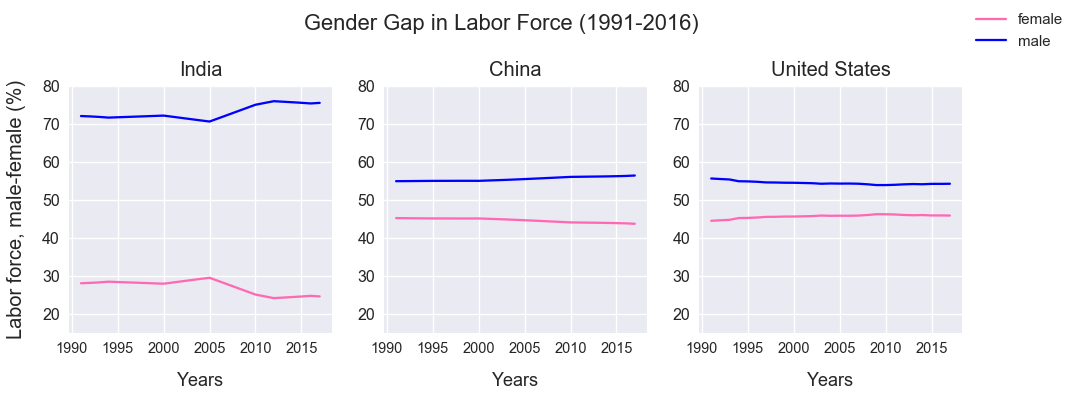

In [70]:
formatter = FuncFormatter(y_fmt)
fig_dims=(16,10)
fig, ax = plt.subplots(figsize=fig_dims)
plt.suptitle("Gender Gap in Labor Force (1991-2016)",y=.98, fontsize=22)
ax1=plt.subplot(2, 3, 1)
ax1.set_ylim(15,80)
ax1.set_ylabel("Labor force, male-female (%)", labelpad=16, fontsize=20)
ax1.set_title("India", y=1.015, fontsize=20)
ax1.set_xlabel("Years", labelpad=16, fontsize=18)
ax1.xaxis.set_tick_params(labelsize=14.5)
ax1.yaxis.set_tick_params(labelsize=16)
l1=ax1.plot(df_labor_frc_women['Years'], df_labor_frc_women['India'], color="hotpink", linestyle="-")[0]
l2=ax1.plot(df_labor_frc_men['Years'], df_labor_frc_men['India'], color="blue", linestyle="-")[0]
ax2=plt.subplot(2, 3, 2)
ax2.set_ylim(15,80)
ax2.set_xlabel("Years", labelpad=16, fontsize=18)
ax2.set_title("China", y=1.015, fontsize=20)
ax2.xaxis.set_tick_params(labelsize=14.5)
ax2.yaxis.set_tick_params(labelsize=16)
df_labor_frc_women.set_index('Years')['China'].plot(color="hotpink", linestyle="-")
df_labor_frc_men.set_index('Years')['China'].plot(color="blue", linestyle="-")
ax3=plt.subplot(2, 3, 3)
ax3.set_ylim(15,80)
ax3.xaxis.set_tick_params(labelsize=14.5)
ax3.yaxis.set_tick_params(labelsize=16)
ax3.set_title("United States", y=1.015, fontsize=20)
ax3.set_xlabel("Years", labelpad=16, fontsize=18)
df_labor_frc_women.set_index('Years')['United States'].plot(color="hotpink", linestyle="-")
df_labor_frc_men.set_index('Years')['United States'].plot(color="blue", linestyle="-");
plt.figlegend([l1, l2],["female", "male"], loc = "best", fancybox=True, fontsize=15);

<img src="confused icon.png" width=40 style="float: left;">

* Focusing on India, there is a big decrease in female labor force starting 2005. It sounds strange because one won't expect a steady labor force participation in earlier years and suddenly its dropping in age of ambitious women!
* My assumption is that may be starting 2005, there was a sharp decrease in female preliminary education, thus the rift in labor force. 
* The analysis below will tell us if its true.

### Rising Education

In [113]:
df_male_low_sec_edu= df[df['Indicator Name'] == 'School enrollment, secondary, male (% gross)']
df_male_low_sec_edu.drop(columns='Indicator Name', inplace=True)
df_male_low_sec_edu=df_male_low_sec_edu.T.reset_index()
df_male_low_sec_edu.columns = df_male_low_sec_edu.iloc[0]
df_male_low_sec_edu=df_male_low_sec_edu.reindex(df_male_low_sec_edu.index.drop(0))
df_male_low_sec_edu.rename(columns={'Country Name': 'Years'}, inplace=True)
df_male_low_sec_edu['Years']=pd.to_numeric(df_male_low_sec_edu['Years'])
df_male_low_sec_edu.dropna(inplace=True)

In [114]:
df_male_prim_edu= df[df['Indicator Name'] == 'School enrollment, primary, male (% gross)']
df_male_prim_edu.drop(columns='Indicator Name', inplace=True)
df_male_prim_edu=df_male_prim_edu.T.reset_index()
df_male_prim_edu.columns = df_male_prim_edu.iloc[0]
df_male_prim_edu=df_male_prim_edu.reindex(df_male_prim_edu.index.drop(0))
df_male_prim_edu.rename(columns={'Country Name': 'Years'}, inplace=True)
df_male_prim_edu['Years']=pd.to_numeric(df_male_prim_edu['Years'])
#df_male_prim_edu.fillna(0, inplace=True)
df_male_prim_edu.dropna(inplace=True)

In [115]:
df_female_low_sec_edu= df[df['Indicator Name'] == 'School enrollment, secondary, female (% gross)']
df_female_low_sec_edu.drop(columns='Indicator Name', inplace=True)
df_female_low_sec_edu=df_female_low_sec_edu.T.reset_index()
df_female_low_sec_edu.columns = df_female_low_sec_edu.iloc[0]
df_female_low_sec_edu=df_female_low_sec_edu.reindex(df_female_low_sec_edu.index.drop(0))
df_female_low_sec_edu.rename(columns={'Country Name': 'Years'}, inplace=True)
df_female_low_sec_edu['Years']=pd.to_numeric(df_female_low_sec_edu['Years'])
#df_female_low_sec_edu.fillna(0, inplace=True)
df_female_low_sec_edu.dropna(inplace=True)

In [116]:
df_female_prim_edu= df[df['Indicator Name'] == 'School enrollment, primary, female (% gross)']
df_female_prim_edu.drop(columns='Indicator Name', inplace=True)
df_female_prim_edu=df_female_prim_edu.T.reset_index()
df_female_prim_edu.columns = df_female_prim_edu.iloc[0]
df_female_prim_edu=df_female_prim_edu.reindex(df_female_prim_edu.index.drop(0))
df_female_prim_edu.rename(columns={'Country Name': 'Years'}, inplace=True)
df_female_prim_edu['Years']=pd.to_numeric(df_female_prim_edu['Years'])
#df_female_prim_edu.fillna(0, inplace=True)
df_female_prim_edu.dropna(inplace=True)

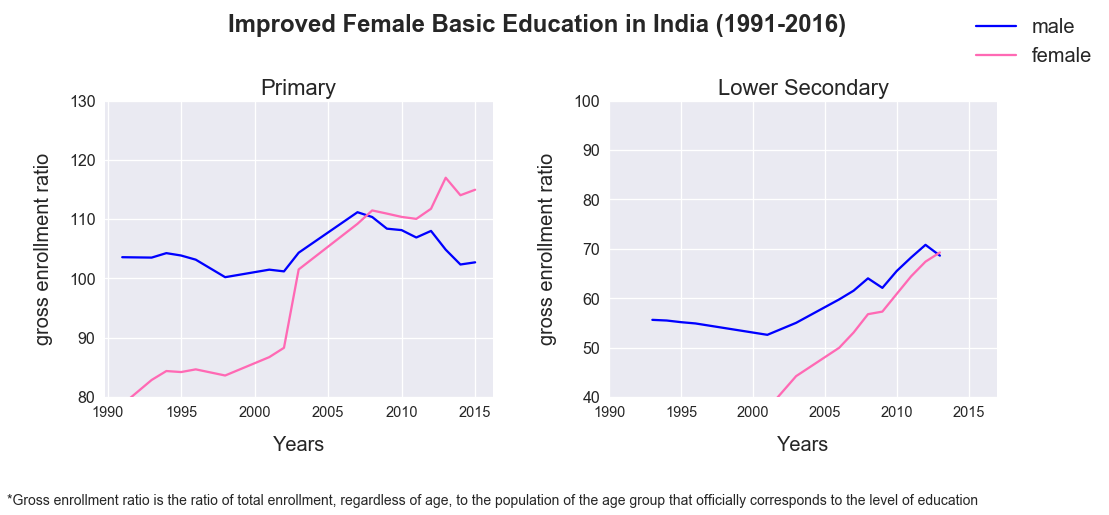

In [147]:
formatter = FuncFormatter(y_fmt)
fig_dims=(16,12)
fig, ax = plt.subplots(figsize=fig_dims)
plt.suptitle("Improved Female Basic Education in India (1991-2016)",y=.98, fontsize=24, fontweight='bold')
ax1=plt.subplot(2, 2, 1)
#ax1.set_title("India", y=1.015, fontsize=20)
ax1.set_ylim(80,130)
ax1.set_title("Primary", fontsize=22)
ax1.set_ylabel("gross enrollment ratio", labelpad=16, fontsize=20)
ax1.set_xlabel("Years", labelpad=16, fontsize=20)
#ax1.xaxis.label.set_visible(False)
#ax1.xaxis.set_ticklabels([])
ax1.xaxis.set_tick_params(labelsize=14.5)
ax1.yaxis.set_tick_params(labelsize=16)
df_male_prim_edu.set_index('Years')['India'].plot(color="blue", linestyle="-")
df_female_prim_edu.set_index('Years')['India'].plot(color="hotpink", linestyle="-")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=.3, hspace=None)
ax4=plt.subplot(2, 2, 2)
ax4.set_ylim(40,100)
ax4.set_xlim(1990,2017)
ax4.set_title("Lower Secondary", fontsize=22)
ax4.set_ylabel("gross enrollment ratio", labelpad=16, fontsize=20)
ax4.set_xlabel("Years", labelpad=16, fontsize=20)
ax4.xaxis.set_tick_params(labelsize=14.5)
ax4.yaxis.set_tick_params(labelsize=16)
l1=ax4.plot(df_male_low_sec_edu['Years'], df_male_low_sec_edu['India'], color="blue", linestyle="-")[0]
l2=ax4.plot(df_female_low_sec_edu['Years'], df_female_low_sec_edu['India'], color="hotpink", linestyle="-")[0]
plt.figlegend([l1, l2],["male", "female"], loc = "best", fancybox=True, fontsize=20);
s="*Gross enrollment ratio is the ratio of total enrollment, regardless of age, to the population of the age group that officially corresponds to the level of education"
plt.text(1, -.35, s, fontsize=14, horizontalalignment='center', verticalalignment='center',transform = ax1.transAxes)
plt.show()

### Insights <a name="i2"></a>
* It is paradoxical that for India the labor force participation has been declining since 2005, However since 2005 women participation in primary and lower secondary education has been higher!
* It would be interesting to see female labor force participation by income group and level of education. However, the dataset is limited in capabilities to do so.
* Theory suggests that women have a curvilinear relationship between education and employment. 
    * It would mean that women with less eduation and less income would be compelled to have a job for sustenance.
    * On the other hand women with advanced education would be ambitious enough to participate in labor force.
    * It would be the women in between who do not meet the gap between mid level education and skilled job requirements.

## 3rd Visualization: Highest CO2 emission in United States  <a name="3v"> </a>

In [14]:
df_co2_emmision=df[df['Indicator Name'] == 'CO2 emissions (metric tons per capita)']
df_co2_emmision.drop(columns='Indicator Name', inplace=True)
df_co2_emmision=df_co2_emmision.T.reset_index()
df_co2_emmision.columns = df_co2_emmision.iloc[0]
df_co2_emmision=df_co2_emmision.reindex(df_co2_emmision.index.drop(0))
df_co2_emmision.rename(columns={'Country Name': 'Years'}, inplace=True)
df_co2_emmision['Years']=pd.to_numeric(df_co2_emmision['Years'])

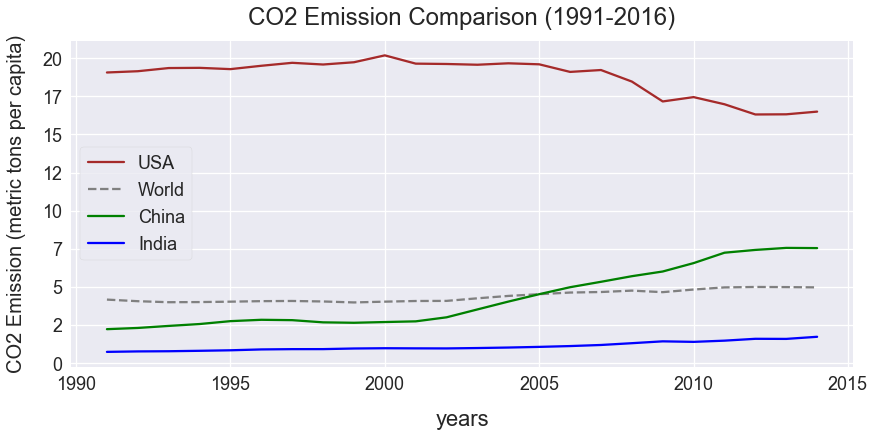

In [180]:
formatter = FuncFormatter(y_fmt)
fig_dims=(14,6)
fig, ax = plt.subplots(figsize=fig_dims)
df_co2_emmision.set_index('Years')['United States'].plot(color="brown", linestyle="-")
df_co2_emmision.set_index('Years')['World'].plot(color="grey", linestyle="--")
df_co2_emmision.set_index('Years')['China'].plot(color="green", linestyle="-")
df_co2_emmision.set_index('Years')['India'].plot(color="blue", linestyle="-")
plt.xlabel("years", fontsize=22, labelpad=16)
plt.ylabel("CO2 Emission (metric tons per capita)", fontsize=20, labelpad=16)
plt.title("CO2 Emission Comparison (1991-2016)",y=1.03, fontsize=24)
plt.tick_params(axis="both", labelsize=18)
plt.legend(['USA', 'World', 'China', 'India'], 
           loc=6, fontsize=18, frameon=True);
ax.grid(b=True)
ax.yaxis.set_major_formatter(formatter);

In [134]:
df_co2=df.loc[df['Indicator Name'].str.find('% of total fuel combustion')!=-1,:]
df_co2_2014=df_co2.loc[:,['Country Name','Indicator Name','2014']]
df_co2_2014=pd.pivot_table(df_co2_2014, values='2014', index='Country Name', columns='Indicator Name')
df_co2_2014.reset_index(inplace=True)
df_co2_2014=df_co2_2014.reindex(df_co2_2014.index.drop(3))
#df_co2_2014=df_co2_2014.loc[df_co2_2014['Country Name']=='united States']

In [190]:
trace1 = go.Bar(
    x=df_co2_2014['Country Name'],
    y=df_co2_2014['CO2 emissions from electricity and heat production, total (% of total fuel combustion)'],
    name='Electricity and Heat'
)
trace2 = go.Bar(
    x=df_co2_2014['Country Name'],
    y=df_co2_2014['CO2 emissions from manufacturing industries and construction (% of total fuel combustion)'],
    name='Manufacturing and Construction'
)
trace3 = go.Bar(
    x=df_co2_2014['Country Name'],
    y=df_co2_2014['CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)'],
    name='Commercial and public services'
)
trace4 = go.Bar(
    x=df_co2_2014['Country Name'],
    y=df_co2_2014['CO2 emissions from transport (% of total fuel combustion)'],
    name='Transport'
)
trace5 = go.Bar(
    x=df_co2_2014['Country Name'],
    y=df_co2_2014['CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)'],
    name='Other sector'
)

data = [trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    barmode='group',
    title="CO2 Emission Composition per Country (2014)",
                 font=dict(size=20),
                 yaxis=dict(title='CO2 emission (% of total fuel combustion)',
                       tickfont=dict(size=16),
                       titlefont=dict(                        
                        size=18,
                        color='black'
                        )),
                showlegend=True,
                 legend=dict(x=48, y=1, font=dict(
            family='sans-serif',
            size=14,
            color='#000'
        ),orientation="h"),
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### Insights <a name="i3"></a>
* United States is well above World average in CO2 emmision, world average at 5% whereas USA CO2 emission rate is 20%.
* India is constantly below world average at around 0.9%
* Electricity and heat production stays the main source of CO2 emission across all three countries.
* In United States, second contributing sector is transport unlike India & China where it is residential buildings. USA can mitigate some of hazardous emissions by launching more policies focused on pollution from transport

## Exploratory Data Analysis <a name='ed'></a>

### Reduction in Rural Population by Country <a name="e1"></a>

In [71]:
df_rural= df[df['Indicator Name'] == 'Rural population (% of total population)']
df_rural.drop(columns='Indicator Name', inplace=True)

In [72]:
df_rural=df_rural.T.reset_index()
df_rural.columns = df_rural.iloc[0]
df_rural=df_rural.reindex(df_rural.index.drop(0))
df_rural.rename(columns={'Country Name': 'Years'}, inplace=True)
df_rural.dropna(inplace=True)
df_rural['Years']=pd.to_numeric(df_rural['Years'])

In [73]:
df_urban= df[df['Indicator Name'] == 'Urban population (% of total)']
df_urban.drop(columns='Indicator Name', inplace=True)
df_urban=df_urban.T.reset_index()
df_urban.columns = df_urban.iloc[0]
df_urban=df_urban.reindex(df_urban.index.drop(0))
df_urban.rename(columns={'Country Name': 'Years'}, inplace=True)
df_urban.dropna(inplace=True)
df_urban['Years']=pd.to_numeric(df_urban['Years'])

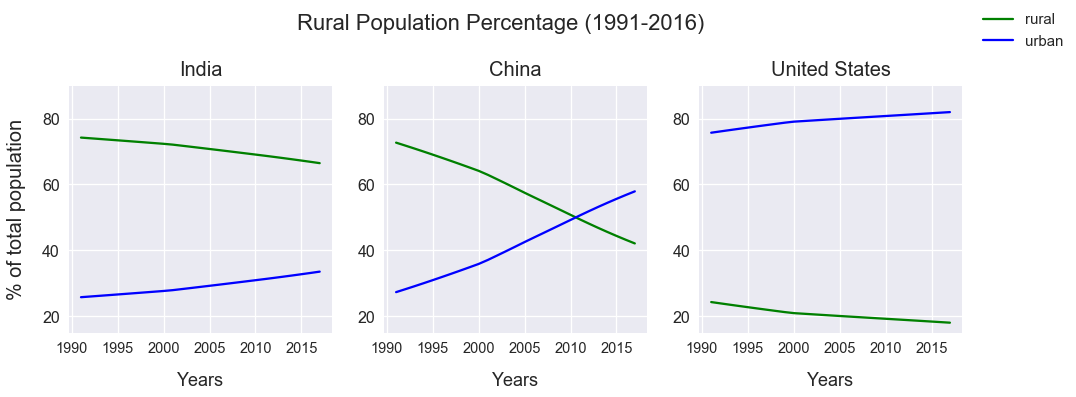

In [74]:
formatter = FuncFormatter(y_fmt)
fig_dims=(16,10)
fig, ax = plt.subplots(figsize=fig_dims)
plt.suptitle("Rural Population Percentage (1991-2016)",y=.98, fontsize=22)
ax1=plt.subplot(2, 3, 1)
ax1.set_ylim(15,90)
ax1.set_ylabel("% of total population", labelpad=16, fontsize=20)
ax1.set_xlabel("Years", labelpad=16, fontsize=18)
ax1.set_title("India", y=1.015, fontsize=20)
ax1.xaxis.set_tick_params(labelsize=14.5)
ax1.yaxis.set_tick_params(labelsize=16)
l1=ax1.plot(df_rural['Years'], df_rural['India'], color="green", linestyle="-")[0]
l2=ax1.plot(df_urban['Years'], df_urban['India'], color="blue", linestyle="-")[0]
ax2=plt.subplot(2, 3, 2)
ax2.set_ylim(15,90)
ax2.set_xlabel("Years", labelpad=16, fontsize=18)
ax2.set_title("China", y=1.015, fontsize=20)
ax2.xaxis.set_tick_params(labelsize=14.5)
ax2.yaxis.set_tick_params(labelsize=16)
df_rural.set_index('Years')['China'].plot(color="green", linestyle="-")
df_urban.set_index('Years')['China'].plot(color="blue", linestyle="-")
ax3=plt.subplot(2, 3, 3)
ax3.set_ylim(15,90)
ax3.set_xlabel("Years", labelpad=16, fontsize=18)
ax3.set_title("United States", y=1.015, fontsize=20)
ax3.xaxis.set_tick_params(labelsize=14.5)
ax3.yaxis.set_tick_params(labelsize=16)
df_rural.set_index('Years')['United States'].plot(color="green", linestyle="-")
df_urban.set_index('Years')['United States'].plot(color="blue", linestyle="-");
plt.figlegend([l1, l2],["rural", "urban"], loc = "best", fancybox=True, fontsize=15);

**summary :**
* In order from India to USA, the visualization clearly shows journey of a developing country towards fulfilling complete sustanance.
* India has more tha 60% population still in Rural areas, whereas USA's more than 80% population stays is urbanized.

### Employment Sectors by Country <a name="e2"></a>

In [75]:
# services sector
df_services= df[df['Indicator Name'] == 'Employment in services (% of total employment) (modeled ILO estimate)']
df_services.drop(columns='Indicator Name', inplace=True)
df_services=df_services.T.reset_index()
df_services.columns = df_services.iloc[0]
df_services=df_services.reindex(df_services.index.drop(0))
df_services.rename(columns={'Country Name': 'Years'}, inplace=True)
df_services['Indicator Name']='Employment in services'
df_services['Years']=pd.to_numeric(df_services['Years'])
# agriculture sector
df_agri= df[df['Indicator Name'] == 'Employment in agriculture (% of total employment) (modeled ILO estimate)']
df_agri.drop(columns='Indicator Name', inplace=True)
df_agri=df_agri.T.reset_index()
df_agri.columns = df_agri.iloc[0]
df_agri=df_agri.reindex(df_agri.index.drop(0))
df_agri.rename(columns={'Country Name': 'Years'}, inplace=True)
df_agri['Indicator Name']='Employment in agriculture'
df_agri['Years']=pd.to_numeric(df_agri['Years'])
# Industrial sector
df_indus= df[df['Indicator Name'] == 'Employment in industry (% of total employment) (modeled ILO estimate)']
df_indus.drop(columns='Indicator Name', inplace=True)
df_indus=df_indus.T.reset_index()
df_indus.columns = df_indus.iloc[0]
df_indus=df_indus.reindex(df_indus.index.drop(0))
df_indus.rename(columns={'Country Name': 'Years'}, inplace=True)
df_indus['Indicator Name']='Employment in Industry'
df_indus['Years']=pd.to_numeric(df_indus['Years'])
df_emp_sectors=pd.concat([df_services, df_agri, df_indus])

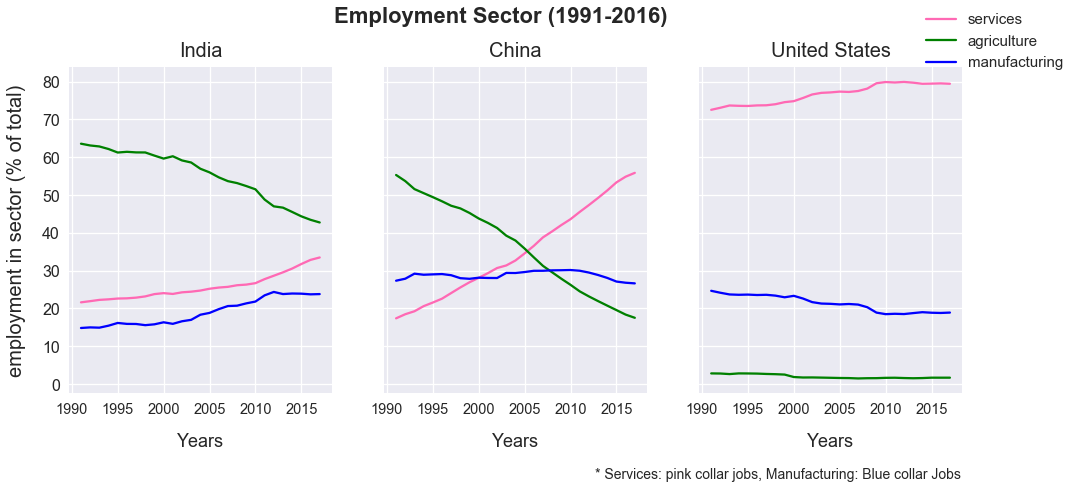

In [78]:
formatter = FuncFormatter(y_fmt)
fig_dims=(16,6)
fig, (ax1, ax2, ax3) = plt.subplots(figsize=fig_dims, sharey=True, nrows=1, ncols=3)
fig.suptitle("Employment Sector (1991-2016)",y=1.02, fontsize=22, fontweight='bold')
#plt.legend( lines, labels, loc = 'lower center', bbox_to_anchor = (0,-0.1,1,1), bbox_transform = plt.gcf().transFigure )
#ax1=plt.subplot(2, 3, 1)
#ax1.set_ylim(0,80)
ax1.set_title("India", y=1.015, fontsize=20)
ax1.set_xlabel("Years", labelpad=16, fontsize=18)
ax1.set_ylabel("employment in sector (% of total)", labelpad=16, fontsize=20)
ax1.xaxis.set_tick_params(labelsize=14.5)
ax1.yaxis.set_tick_params(labelsize=16)
l1=ax1.plot(df_services['Years'], df_services['India'], color="hotpink", linestyle="-", label="services")[0]
l2=ax1.plot(df_agri['Years'], df_agri['India'], color="green", linestyle="-", label="agri")[0]
l3=ax1.plot(df_indus['Years'], df_indus['India'], color="blue", linestyle="-")[0]
#ax2=plt.subplot(2, 3, 2)
#ax2.set_ylim(0,80)
ax2.set_title("China", y=1.015, fontsize=20)
ax2.set_xlabel("Years", labelpad=16, fontsize=18)
ax2.xaxis.set_tick_params(labelsize=14.5)
df_services.set_index('Years')['China'].plot(color="hotpink", linestyle="-", ax=ax2)
df_agri.set_index('Years')['China'].plot(color="green", linestyle="-", ax=ax2)
df_indus.set_index('Years')['China'].plot(color="blue", linestyle="-", ax=ax2)
#ax3=plt.subplot(2, 3, 3)
#ax3.set_ylim(0,80)
ax3.set_title("United States", y=1.015, fontsize=20)
ax3.set_xlabel("Years", labelpad=16, fontsize=18)
ax3.xaxis.set_tick_params(labelsize=14.5)
df_services.set_index('Years')['United States'].plot(color="hotpink", linestyle="-", ax=ax3)
df_agri.set_index('Years')['United States'].plot(color="green", linestyle="-", ax=ax3);
df_indus.set_index('Years')['United States'].plot(color="blue", linestyle="-", ax=ax3);
plt.figlegend([l1, l2, l3],["services", "agriculture", "manufacturing"], loc = "best", fancybox=True, fontsize=15)
s="* Services: pink collar jobs, Manufacturing: Blue collar Jobs"
plt.text(2.7, -.25, s, fontsize=14, horizontalalignment='center', verticalalignment='center',transform = ax1.transAxes)
plt.show()

**Summary:**
* There is a clear increment in service industry when we move from India to United States in order. It can also be seen as a journey of any country towards development
* 40% of Indian employment is in agriculture, whereas over 90% of United States employment is in service industry with very little agricultural employment.

### GDP Comparison of USA, India, China with World GDP <a name="e3"></a>

In [79]:
df_gdp=df[df['Indicator Name'] == 'GDP (current US$)']
df_gdp.drop(columns='Indicator Name', inplace=True)
df_gdp=df_gdp.T.reset_index()
df_gdp.columns = df_gdp.iloc[0]
df_gdp=df_gdp.reindex(df_gdp.index.drop(0))
df_gdp.rename(columns={'Country Name': 'Years'}, inplace=True)
df_gdp['Years']=pd.to_numeric(df_gdp['Years'])

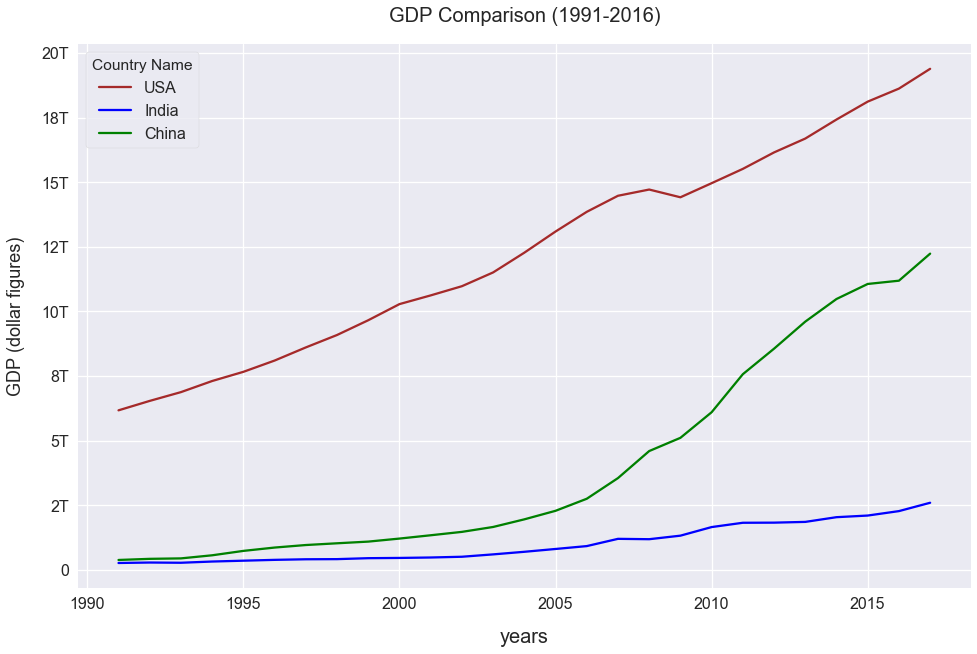

In [80]:
formatter = FuncFormatter(y_fmt)
fig_dims=(16,10)
fig, ax = plt.subplots(figsize=fig_dims)
#df_gdp.set_index('Years')['World'].plot(color="grey", linestyle="--")
df_gdp.set_index('Years')['United States'].plot(color="brown", linestyle="-")
df_gdp.set_index('Years')['India'].plot(color="blue", linestyle="-")
df_gdp.set_index('Years')['China'].plot(color="green", linestyle="-")
plt.xlabel("years", fontsize=20, labelpad=16)
plt.ylabel("GDP (dollar figures)", fontsize=18, labelpad=16)
plt.title("GDP Comparison (1991-2016)",y=1.03, fontsize=20)
plt.tick_params(axis="both", labelsize=16)
plt.legend(['USA', 'India', 'China'], 
           loc=0, fontsize=16, frameon=True, title="Country Name", bbox_to_anchor=(0., 1., 1., 0.));
ax.grid(b=True)
ax.yaxis.set_major_formatter(formatter);

**Summary:**
* USA has the highest GDP above 19 Trillion, with China developing with a significant growth rate at close to 12 trillion in 2017. 
* Increase in China GDP can be accounted towards its authoritarian regime, which world is well aware of. The other most most important factor is how much China is stressing on expansion of human capabilities before economic development.

### Compare Road Traffic Fatal Injuries in United States, India and China <a name="e4"></a>

In [81]:
df_traffic_deaths=df[df['Indicator Name'] == 'Mortality caused by road traffic injury (per 100,000 people)']
df_traffic_deaths.drop(columns='Indicator Name', inplace=True)
df_traffic_deaths=df_traffic_deaths.T.reset_index()
df_traffic_deaths.columns = df_traffic_deaths.iloc[0]
df_traffic_deaths=df_traffic_deaths.reindex(df_traffic_deaths.index.drop(0))
df_traffic_deaths.rename(columns={'Country Name': 'Years'}, inplace=True)
df_traffic_deaths.dropna(inplace=True)
df_traffic_deaths['Years']=pd.to_numeric(df_traffic_deaths['Years'])

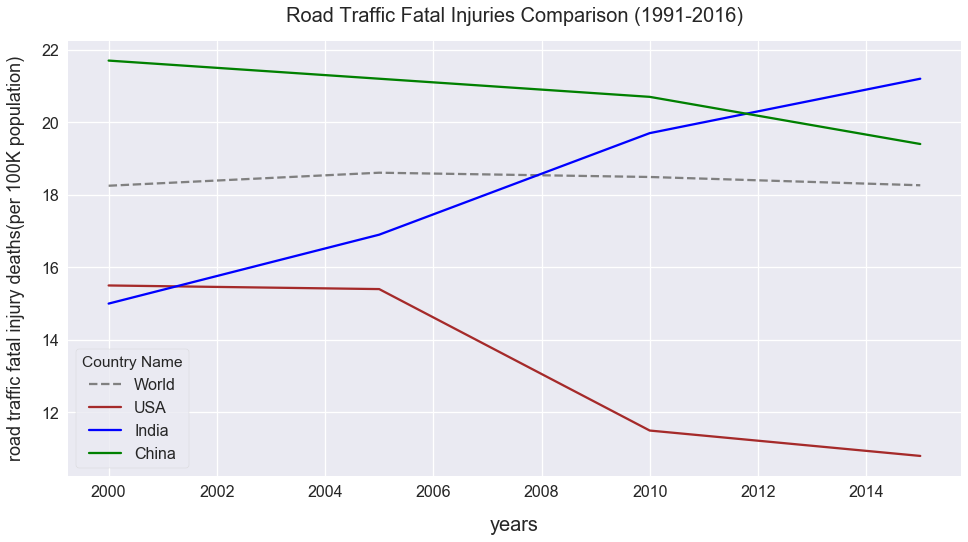

In [82]:
formatter = FuncFormatter(y_fmt)
fig_dims=(16,8)
fig, ax = plt.subplots(figsize=fig_dims)
df_traffic_deaths.set_index('Years')['World'].plot(color="grey", linestyle="--")
df_traffic_deaths.set_index('Years')['United States'].plot(color="brown", linestyle="-")
df_traffic_deaths.set_index('Years')['India'].plot(color="blue", linestyle="-")
df_traffic_deaths.set_index('Years')['China'].plot(color="green", linestyle="-")
plt.xlabel("years", fontsize=20, labelpad=16)
plt.ylabel("road traffic fatal injury deaths(per 100K population)", fontsize=18, labelpad=16)
plt.title("Road Traffic Fatal Injuries Comparison (1991-2016)",y=1.03, fontsize=20)
plt.tick_params(axis="both", labelsize=16)
plt.legend(['World','USA', 'India', 'China'], 
           loc=0, fontsize=16, frameon=True, title="Country Name");
ax.grid(b=True)
ax.yaxis.set_major_formatter(formatter);

**Summary:**
* USA has done a very good job at being stringent about traffic laws and implementing paramedic facilities during road accidents. As a result, in 100,000 people only around 4 people die due to traffic injuries.
* India & China are highly populated nations, which makes it difficult to contain road accidents with no law enforcement.

### All Three Countries have over 50% Employment to Population Ratio <a name="e5"></a>

In [83]:
df_emp=df[df['Indicator Name'] == 'Employment to population ratio, 15+, total (%) (modeled ILO estimate)']
df_emp=df_emp.loc[:,['Country Name','Indicator Name','2017']]
df_emp=pd.pivot_table(df_emp, values='2017', index='Country Name', columns='Indicator Name')
df_emp.reset_index(inplace=True)
df_emp=df_emp.reindex(df_emp.index.drop(3))

In [175]:
trace1 = go.Bar({
    'x':df_emp['Country Name'],
    'y':df_emp['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'].sort_values(ascending=False),
    'name':'15+',
    'marker':dict(
        color=['rgba(0, 128, 0,1)','rgba(0, 0, 128,1)',
    'rgba(128, 0, 0,1)']),
    'opacity':1
})
data = [trace1]
layout = go.Layout(
    barmode='group',
    title="Employment to population ratio per Country (2017)",
                 font=dict(size=18),
                 yaxis=dict(title='Employment to population ratio, total (%)',
                        tickfont=dict(size=14),
                       titlefont=dict(                        
                        size=16,
                        color='#7f7f7f')),
                showlegend=False,
)
annotations=[]
for index, row in df_emp.iterrows():
    temp=df_emp.loc[index]
    if temp['Country Name']=="China":
        pos=7
        col='rgba(0, 128, 0,1)'
    elif temp['Country Name']=="India":
        pos=15
        col='rgba(0, 0, 128,1)'
    elif temp['Country Name']=="United States":
        pos=0
        col='rgba(128, 0, 0,1)'
    annotations.append(dict(x=temp['Country Name'], y=(temp['Employment to population ratio, 15+, total (%) (modeled ILO estimate)']+pos), text=(str(round(float(temp['Employment to population ratio, 15+, total (%) (modeled ILO estimate)']),2))+"%"),
                                font=dict(family='Arial', size=16,
                                color=col),
                                showarrow=False,))    
layout['annotations']=annotations
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Summary:**
* Employment to population ratio is highest in China, followed by India and then USA.